# Yelp Reviews EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()
pd.set_option("display.max_columns", None)
%config InlineBackend.figure_format = 'retina'

import plotly.offline as pyo
from plotly.offline import iplot, plot
import plotly.graph_objs as go
import plotly.express as px
pyo.init_notebook_mode(connected=True)

import config

print("Setup Complete.")

Setup Complete.


## Importing the Data

In [2]:
# reading in data
business_df = pd.read_csv('../data/can_yelp_businesses.csv')
reviews_df = pd.read_csv('../data/can_yelp_reviews.csv')

In [3]:
print(business_df.shape)
business_df.head()

(7506, 14)


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,D4JtQNTI4X3KcbzacDJsMw,Bob Likes Thai Food,3755 Main St,Vancouver,BC,V5V,49.251342,-123.101333,3.5,169,1,"{'GoodForKids': 'True', 'Alcohol': ""u'none'"", ...","Restaurants, Thai","{'Monday': '17:0-21:0', 'Tuesday': '17:0-21:0'..."
1,QciD6FbNklaJvUbLExD4Nw,ARGO,"3790 Canada Way, Unit 108",Burnaby,BC,V5G 1G4,49.254436,-123.020050,4.0,76,1,"{'WheelchairAccessible': 'False', 'Restaurants...","Food Delivery Services, Food, Restaurants, Med...","{'Monday': '0:0-0:0', 'Tuesday': '11:30-21:0',..."
2,Xi2GGNzOiUS8r6WCFvu-fw,Kerala Kitchen,103- 9386 120 Street,Surrey,BC,V3V 4B9,49.173723,-122.889641,4.0,9,1,"{'BusinessParking': ""{'garage': False, 'street...","Indian, Restaurants","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."
3,NoPXKdIwRzflOW-5exFAqA,1st Avenue Seafood by Pocha,901 Lougheed Hwy,Coquitlam,BC,V3K 3T3,49.237547,-122.872628,4.0,12,0,"{'Ambience': ""{'touristy': False, 'hipster': F...","Restaurants, Korean, Seafood","{'Tuesday': '11:30-23:0', 'Wednesday': '11:30-..."
4,jfDfHzAq6iKkRnzzZ4n1nQ,Let's Roll Custom Sushi Bar,"1184 Denman Street, Suite 104",Vancouver,BC,V6G 2M9,49.286360,-123.140261,4.5,31,0,"{'RestaurantsAttire': ""u'casual'"", 'HasTV': 'F...","Restaurants, Canadian (New), Sushi Bars, Ameri...","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."


In [4]:
print(reviews_df.shape)
reviews_df.sample(5)

(426790, 18)


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,user_id,review_stars,text,date
274053,BLITQJYfKJSQ9XNuk8pIrw,Parker Place Aberdeen Meat & B.B.Q,1020 - 4380 No 3 Rd,Richmond,BC,V6X 3V7,49.181540,-123.135936,4.0,143,1,"{'GoodForKids': 'True', 'RestaurantsPriceRange...","Specialty Food, Meat Shops, Barbeque, Food, Re...","{'Monday': '11:0-19:0', 'Tuesday': '11:0-19:0'...",L6LTcLM4qrRP9jNU97x3UA,5,"The hype is real, this place got the best roas...",2016-07-17 00:35:25
196686,EB-AE8D49HQfnoSX8TopYg,Elephant & Castle,385 Burrard St,Vancouver,BC,V6C 2G8,49.287259,-123.117101,3.5,131,0,"{'WiFi': ""'free'"", 'Caters': 'False', 'GoodFor...","Nightlife, British, Restaurants, Bars, Pubs","{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'...",_JLrlLcaRt6YBavRMoPcOA,3,Came to meet my fiance and his friend to grab ...,2015-11-09 18:50:51
259725,daocqDkXz0zubenI8ilYlw,Wang's Shanghai Cuisine,"3328 Kingsway, Suite 110",Vancouver,BC,V5T 5L1,49.232843,-123.034814,4.0,122,1,"{'RestaurantsReservations': 'False', 'Alcohol'...","Restaurants, Chinese, Dumplings, Dim Sum, Nood...","{'Monday': '17:0-21:30', 'Tuesday': '17:0-21:3...",8E5p96Axj5EQqXOrNrAHOA,4,Fantastic and inexpensive Shanghainese food. I...,2017-06-03 19:45:24
403462,jjmcW694yENEvwenazdx4w,Red Robin Gourmet Burgers and Brews,9628 Cameron St,Burnaby,BC,V3J 1M2,49.252654,-122.898292,2.5,82,1,"{'BikeParking': 'True', 'RestaurantsTakeOut': ...","American (Traditional), Burgers, Restaurants","{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'...",xY1nPD8D7uGvbFNutdzzNA,3,Pleasant environment and very family friendly....,2015-08-23 23:52:40
134373,nq5Ms7rb6fVAnq6zm6tIAQ,Bai Bua Thai Cuisine,2443 E Hastings Street,Vancouver,BC,V5C 0C2,49.281383,-123.055630,4.0,119,1,"{'RestaurantsGoodForGroups': 'True', 'BikePark...","Restaurants, Thai","{'Tuesday': '17:0-21:30', 'Wednesday': '17:0-2...",SbeTaxlyJBgj1MCBdIpgjA,5,So thankful that I have found this place! This...,2016-06-13 23:06:56


Now that we've got our data loaded in let's check out the distribution of the ratings for businesses.

In [52]:
x = business_df['stars'].value_counts().index
y = business_df['stars'].value_counts().values

colors = ['#f72585', '#b5179e', '#7209b7', '#560bad', '#480ca8', '#3a0ca3', '#3f37c9', '#4361ee', '#4895ef']

fig = go.Figure(data=[go.Bar(
            x=x,
            y=y,
            text=y,
            textposition='auto',
            marker={'color':colors}
)])
fig.update_layout(title="Star Rating Distribution",
                 xaxis_title="Star Rating",
                 yaxis_title="Count",
                 )
fig.show()

Check distribution of types of cuisine

In [8]:
# getting the categories
print(business_df['categories'].value_counts())

Chinese, Restaurants                                                                     144
Restaurants, Chinese                                                                     136
Restaurants, Pizza                                                                       118
Pizza, Restaurants                                                                       114
Japanese, Restaurants                                                                     85
                                                                                        ... 
Chinese, Bakeries, Food, Restaurants                                                       1
Poke, Hawaiian, Food, Restaurants                                                          1
Coffee & Tea, Tea Rooms, Bubble Tea, Food, Juice Bars & Smoothies, Restaurants, Cafes      1
Food, Food Stands, Restaurants, Street Vendors, Sandwiches                                 1
American (Traditional), Italian, Restaurants                          

In [9]:
biz_category = ' '.join(business_df['categories'])
biz_cat = biz_category.split(',')

biz_category_df = pd.DataFrame(biz_category.split(','), columns=['category'])

print(biz_category_df.category.value_counts())

 Restaurants                                 2963
 Food                                        1444
 Restaurants Restaurants                      696
 Nightlife                                    508
 Coffee & Tea                                 501
                                             ... 
 Singaporean Indian                             1
 Hot Pot Sushi Bars                             1
 Vegetarian Latin American                      1
 African Chinese                                1
 Specialty Food Ice Cream & Frozen Yogurt       1
Name: category, Length: 2806, dtype: int64


In [67]:
# plotly version
fig = px.bar(top_20, x=top_20.values, y=top_20.index, text=top_20.values, orientation='h', 
             color=top_20.index, 
             color_discrete_sequence=px.colors.qualitative.Alphabet_r)
fig.update_layout(xaxis=dict(
        title="Count", 
        titlefont=dict(size=16)), 
                  yaxis=dict(
                      title="Business Category", 
                      titlefont=dict(size=16)),
                 height=700,
                 width=1000,
                 title="Top 20 Business Categories",
                 )
fig.show()

Let's have a look at which restaurants are the most reviewed

In [13]:
business_df[['name', 'stars', 'review_count', 'city']].sort_values(by="review_count", ascending=False)[:50]

,name,stars,review_count,city
234,Medina Cafe,4.0,2302,Vancouver
3247,Miku,4.5,1805,Vancouver
4530,Chambar,4.0,1356,Vancouver
2393,Phnom Penh,4.0,1306,Vancouver
2416,Jam Cafe on Beatty,4.5,1097,Vancouver
6116,The Flying Pig - Yaletown,4.0,1092,Vancouver
1143,Joe Fortes Seafood & Chop House,4.0,1037,Vancouver
2503,Twisted Fork,4.0,1032,Vancouver
3810,Japadog,4.0,987,Vancouver
2576,Hokkaido Ramen Santouka,4.0,949,Vancouver


Which city has the most reviews & the highest average rating?

In [14]:
business_df[['name', 'stars', 'review_count', 'city']].groupby(['city']).agg({'review_count': 'sum', 'stars': 'mean'}).sort_values(by="review_count", ascending=False)[:50]

,review_count,stars
city,,
Vancouver,296073,3.511228
Richmond,38498,3.253333
Burnaby,27425,3.353746
North Vancouver,12720,3.480822
Coquitlam,10161,3.393189
New Westminster,9272,3.461207
Surrey,7024,3.385762
West Vancouver,3324,3.524272
Port Moody,2525,3.422535


Vancouver dominates the restaurant industry in BC clearly, with 47 out of the top 50 restaurants.

Checking the number of businesses in each city.

In [15]:
business_df[['city', 'business_id']].groupby(['city'])['business_id'].agg('count').sort_values(ascending=False)

city
Vancouver              4275
Richmond                900
Burnaby                 694
North Vancouver         365
Coquitlam               323
Surrey                  302
New Westminster         232
Port Coquitlam          109
West Vancouver          103
Delta                    97
Port Moody               71
Bowen Island             14
Steveston                 2
BURNABY                   2
New Westminister          2
Ladner                    2
Greater Vancouver A       2
NEW WESTMINSTER           1
PORT COQUITLAM            1
N Vancouver               1
Lions Bay                 1
Port coquitlam            1
RICHMOND                  1
RichMond                  1
SURREY                    1
Fraser Heights            1
Downtown Vancouver        1
Newwestminster            1
Name: business_id, dtype: int64

Now we can see why Vancouver was the city with the most reviews, it's got the most restaurants by quite a large margin!

There's some city names that are weirdly spelled. We'll have to fix that so we have proper counts of restaurants in each city.

In [16]:
business_df['city'] = business_df['city'].replace(['New Westminister', 'NEW WESTMINSTER', 'Newwestminster'], 'New Westminster')
business_df['city'] = business_df['city'].replace(['BURNABY'], 'Burnaby')
business_df['city'] = business_df['city'].replace(['SURREY'], 'Surrey')
business_df['city'] = business_df['city'].replace(['PORT COQUITLAM', 'Port coquitlam'], 'Port Coquitlam')
business_df['city'] = business_df['city'].replace(['RICHMOND', 'RichMond'], 'Richmond')
business_df['city'] = business_df['city'].replace(['N Vancouver'], 'North Vancouver')

In [17]:
business_df['city'].value_counts()

Vancouver              4275
Richmond                902
Burnaby                 696
North Vancouver         366
Coquitlam               323
Surrey                  303
New Westminster         236
Port Coquitlam          111
West Vancouver          103
Delta                    97
Port Moody               71
Bowen Island             14
Greater Vancouver A       2
Ladner                    2
Steveston                 2
Fraser Heights            1
Lions Bay                 1
Downtown Vancouver        1
Name: city, dtype: int64

Let's rename the "Downtown Vancouver" location to just "Vancouver". Clean up "Greater Vancouver A" to "Greater Vancouver". There's a possibility that "Greater Vancouver" is just "North Vancouver" but we'll leave that thought aside for now and not look into it too much.

In [18]:
business_df['city'] = business_df['city'].replace(['Greater Vancouver A'], 'Greater Vancouver')
business_df['city'] = business_df['city'].replace(['Downtown Vancouver'], 'Vancouver')

In [19]:
business_df[['city', 'business_id']].groupby(['city'])['business_id'].agg('count').sort_values(ascending=False)

city
Vancouver            4276
Richmond              902
Burnaby               696
North Vancouver       366
Coquitlam             323
Surrey                303
New Westminster       236
Port Coquitlam        111
West Vancouver        103
Delta                  97
Port Moody             71
Bowen Island           14
Ladner                  2
Greater Vancouver       2
Steveston               2
Lions Bay               1
Fraser Heights          1
Name: business_id, dtype: int64

In [68]:
cities = business_df['city'].value_counts()

fig = px.bar(cities, x=cities.values, y=cities.index, text=cities.values, orientation='h', color=cities.index, color_discrete_sequence=px.colors.sequential.Agsunset)
fig.update_layout(xaxis=dict(
        title="Count", 
        titlefont=dict(size=16)), 
                  yaxis=dict(
                      title="City", 
                      titlefont=dict(size=16)),
                 height=700,
                 width=1000,
                 title="Number of Businesses per City")
fig.show()

Since the city names were fixed, let's see the average number of stars and the total review count for each city again

In [21]:
business_df[['name', 'stars', 'review_count', 'city']].groupby(['city']).agg({'review_count': 'sum', 'stars': 'mean'}).sort_values(by="review_count", ascending=False)[:50]

,review_count,stars
city,,
Vancouver,296104,3.511342
Richmond,38635,3.253326
Burnaby,27515,3.352730
North Vancouver,12754,3.480874
Coquitlam,10161,3.393189
New Westminster,9322,3.447034
Surrey,7038,3.386139
West Vancouver,3324,3.524272
Port Coquitlam,2564,3.576577


Check the highest average rating per cuisine type

In [22]:
category_stars_df = business_df[['categories', 'stars']]
category_stars_df.sample(5)

,categories,stars
1949,"Juice Bars & Smoothies, Restaurants, Vegetaria...",4.0
7369,"American (Traditional), Bars, Restaurants, Spo...",3.5
5296,"Food, Coffee & Tea, Restaurants, Bakeries, San...",4.0
6050,"Breakfast & Brunch, Sandwiches, Cafes, Restaur...",4.0
917,"Burgers, Chicken Wings, Korean, Restaurants, F...",3.5


In [23]:
category_stars_df[['categories', 'stars']].groupby(['categories'])['stars'].agg('mean').sort_values(ascending=False)

categories
Coffee & Tea, Food, Breakfast & Brunch, Restaurants, Sandwiches             5.0
Bubble Tea, Tea Rooms, Food, Cafes, Coffee & Tea, Restaurants               5.0
Food, Bubble Tea, Restaurants, Cafes, Juice Bars & Smoothies                5.0
Bars, Fish & Chips, Seafood, Restaurants, Cocktail Bars, Nightlife          5.0
Korean, Sandwiches, Restaurants, Waffles                                    5.0
                                                                           ... 
Food Delivery Services, Restaurants, Chicken Wings, Pizza, Food, Italian    1.0
Restaurants, Food, Donuts, Sandwiches, Coffee & Tea                         1.0
Fast Food, Pizza, Food, Restaurants                                         1.0
American (New), Restaurants, Chinese                                        1.0
Food Delivery Services, Salad, Restaurants, Food, Pizza                     1.0
Name: stars, Length: 4677, dtype: float64

In [24]:
category_stars_df.shape

(7506, 2)

In [25]:
top_50 = business_df[['name', 'stars', 'review_count', 'city']].sort_values(ascending=False, by="review_count")[:50]
top_50.head()

,name,stars,review_count,city
234,Medina Cafe,4.0,2302,Vancouver
3247,Miku,4.5,1805,Vancouver
4530,Chambar,4.0,1356,Vancouver
2393,Phnom Penh,4.0,1306,Vancouver
2416,Jam Cafe on Beatty,4.5,1097,Vancouver


What I would like to do next is visualize the highest ratings by review count in a map to be able to see where the most popular areas are. To do this, I've found that Plotly Mapbox is a great tool that renders a really clean map showing every distinct point that we need.

In [26]:
px.set_mapbox_access_token(config.mapbox_access_token)
fig = px.scatter_mapbox(data_frame=business_df, lat='latitude', lon='longitude',
                        color='stars', size='review_count', hover_name='name',
                        color_continuous_scale=px.colors.cyclical.IceFire)
fig.update_layout(mapbox_style="carto-positron")
fig.show();

In [69]:
import gmaps
import gmaps.datasets

In [70]:
gmaps.configure(api_key=config.gmaps_api_key)

In [71]:
lat = business_df['latitude'].values
long = business_df['longitude'].values
rest_locations = list(zip(lat, long))
fig = gmaps.figure()
rest_map = gmaps.heatmap_layer(rest_locations)
fig.add_layer(rest_map)
fig

Figure(layout=FigureLayout(height='420px'))

Let's add some points on the map above that show the main centroids (k-means clustering) of where the hot spots for restaurants are. we have to import k-means from scikit-learn first and then we'll create a clustering function and add that as a layer on the map.

In [30]:
from sklearn.cluster import KMeans

In [31]:
def k_rest_clusters(k):
    """Use KMeans algorithm to find k clusters of restaurants"""
    kmeans = KMeans(n_clusters=k).fit(rest_locations)
    clusters = kmeans.cluster_centers_
    return clusters

In [32]:
kmeans_rest = k_rest_clusters(6)
kmeans_rest

array([[  49.25385608, -122.80683527],
       [  49.27758317, -123.11139934],
       [  49.25009879, -123.01877153],
       [  49.1727556 , -123.13309508],
       [  49.20444027, -122.89796382],
       [  49.27304129, -123.18420648]])

Adding the centroids to the Google Map above.

In [33]:
cluster_centers_layer = gmaps.symbol_layer(kmeans_rest, fill_color='black', stroke_color='blue', scale=5)
fig.add_layer(cluster_centers_layer)
fig

Figure(layout=FigureLayout(height='420px'))

We can do some more visualizations to get more info but I'll stop for now. After some further EDA, turn this section into a streamlit app (look at NYC uber pickups demo app for inspo). Next I'll do NLP analysis on the reviews dataset, analyze sentiment & polarity, visualize words for positive and negative reviews in a wordcloud. Maybe dos ome topic modeling (LDA). Final big component is to make a restaurant recommender

In [34]:
# For separating "Restaurants" out of the `categories` column 
# I've seen this trick a couple of times with modifications

# from https://github.com/victorchennn/Yelp-Analysis/blob/master/Yelp.ipynb

# def rest_categories_city(l):
#     d = {}
#     for row in l.index:
#         stars = l.loc[row, ]['stars']
#         for c in l.loc[row, ]['categories']:
#             if c != 'Restaurants':
#                 if c not in d.keys():
#                     d[c] = [stars]
#                 else:
#                     d[c].append(stars)
    
#     rest_categories = pd.DataFrame({'stars':list(d.values())})
#     rest_categories.index = d.keys()
#     rest_categories['number'] = rest_categories['stars'].apply(lambda a : len(a))
#     rest_categories['percentage'] = rest_categories['number'] / len(l) * 100
#     rest_categories['average_stars'] = rest_categories['stars'].apply(lambda a : sum(a) / len(a))
#     rest_categories = rest_categories.drop(['stars'], axis=1)
    
#     return rest_categories

# Another Version

# from https://www.kaggle.com/vksbhandary/exploring-yelp-reviews-dataset#Top-reviewed-business

# top_business = 30 # choose categories of top 30 businesses
# cat_data = top_business_data.sort_values("rated")[::-1][:top_business]
# #cat_data.categories
# Categories={}
# for cat in cat_data.categories.values:
#     all_categories= cat.split(",")
#     for x in all_categories:
#         try :
#             Categories[x] =Categories[x]+1
#         except:
#             Categories[x]=1
# top_categories = pd.DataFrame.from_dict(data= Categories,orient="index")
# top_categories.reset_index(inplace=True)
# top_categories.columns = ['category', 'occurance']

# x_val=top_categories.sort_values("occurance")[::-1][:num_cat].occurance.values
# labels=top_categories.sort_values("occurance")[::-1][:num_cat].category.values

In [35]:
list_cat = []
for category in business_df['categories']:
    list_cat.append(category.split(','))

print(list_cat[:20])

[['Restaurants', ' Thai'], ['Food Delivery Services', ' Food', ' Restaurants', ' Mediterranean', ' Greek', ' Pizza'], ['Indian', ' Restaurants'], ['Restaurants', ' Korean', ' Seafood'], ['Restaurants', ' Canadian (New)', ' Sushi Bars', ' American (New)'], ['Seafood', ' Restaurants', ' Fish & Chips'], ['Restaurants', ' Pizza'], ['Restaurants', ' Chinese'], ['Food', ' Coffee & Tea', ' Restaurants', ' Cafes'], ['Chinese', ' Restaurants'], ['Restaurants', ' Indian'], ['Canadian (New)', ' Cocktail Bars', ' Bars', ' Nightlife', ' Restaurants', ' Sushi Bars'], ['Bars', ' Restaurants', ' Sandwiches', ' American (Traditional)', ' Cocktail Bars', ' Chicken Shop', ' Nightlife'], ['Restaurants', ' Pizza'], ['Bars', ' Lounges', ' Nightlife', ' Cafes', ' Restaurants', ' Hookah Bars'], ['Filipino', ' Noodles', ' Restaurants'], ['Food', ' Ethnic Food', ' Mexican', ' Specialty Food', ' Restaurants'], ['Burgers', ' Restaurants', ' Coffee & Tea', ' Fast Food', ' Food'], ['Restaurants', ' Italian', ' Pizz

In [36]:
list_cat[:25]

[['Restaurants', ' Thai'],
 ['Food Delivery Services',
  ' Food',
  ' Restaurants',
  ' Mediterranean',
  ' Greek',
  ' Pizza'],
 ['Indian', ' Restaurants'],
 ['Restaurants', ' Korean', ' Seafood'],
 ['Restaurants', ' Canadian (New)', ' Sushi Bars', ' American (New)'],
 ['Seafood', ' Restaurants', ' Fish & Chips'],
 ['Restaurants', ' Pizza'],
 ['Restaurants', ' Chinese'],
 ['Food', ' Coffee & Tea', ' Restaurants', ' Cafes'],
 ['Chinese', ' Restaurants'],
 ['Restaurants', ' Indian'],
 ['Canadian (New)',
  ' Cocktail Bars',
  ' Bars',
  ' Nightlife',
  ' Restaurants',
  ' Sushi Bars'],
 ['Bars',
  ' Restaurants',
  ' Sandwiches',
  ' American (Traditional)',
  ' Cocktail Bars',
  ' Chicken Shop',
  ' Nightlife'],
 ['Restaurants', ' Pizza'],
 ['Bars', ' Lounges', ' Nightlife', ' Cafes', ' Restaurants', ' Hookah Bars'],
 ['Filipino', ' Noodles', ' Restaurants'],
 ['Food', ' Ethnic Food', ' Mexican', ' Specialty Food', ' Restaurants'],
 ['Burgers', ' Restaurants', ' Coffee & Tea', ' Fast Fo

In [37]:
list_cat = [category.split(',') for category in business_df['categories']]

In [38]:
list_cat[:20]

[['Restaurants', ' Thai'],
 ['Food Delivery Services',
  ' Food',
  ' Restaurants',
  ' Mediterranean',
  ' Greek',
  ' Pizza'],
 ['Indian', ' Restaurants'],
 ['Restaurants', ' Korean', ' Seafood'],
 ['Restaurants', ' Canadian (New)', ' Sushi Bars', ' American (New)'],
 ['Seafood', ' Restaurants', ' Fish & Chips'],
 ['Restaurants', ' Pizza'],
 ['Restaurants', ' Chinese'],
 ['Food', ' Coffee & Tea', ' Restaurants', ' Cafes'],
 ['Chinese', ' Restaurants'],
 ['Restaurants', ' Indian'],
 ['Canadian (New)',
  ' Cocktail Bars',
  ' Bars',
  ' Nightlife',
  ' Restaurants',
  ' Sushi Bars'],
 ['Bars',
  ' Restaurants',
  ' Sandwiches',
  ' American (Traditional)',
  ' Cocktail Bars',
  ' Chicken Shop',
  ' Nightlife'],
 ['Restaurants', ' Pizza'],
 ['Bars', ' Lounges', ' Nightlife', ' Cafes', ' Restaurants', ' Hookah Bars'],
 ['Filipino', ' Noodles', ' Restaurants'],
 ['Food', ' Ethnic Food', ' Mexican', ' Specialty Food', ' Restaurants'],
 ['Burgers', ' Restaurants', ' Coffee & Tea', ' Fast Fo

In [39]:
business_df['rest_categories'] = list_cat

In [40]:
business_df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,rest_categories
0,D4JtQNTI4X3KcbzacDJsMw,Bob Likes Thai Food,3755 Main St,Vancouver,BC,V5V,49.251342,-123.101333,3.5,169,1,"{'GoodForKids': 'True', 'Alcohol': ""u'none'"", ...","Restaurants, Thai","{'Monday': '17:0-21:0', 'Tuesday': '17:0-21:0'...","[Restaurants, Thai]"
1,QciD6FbNklaJvUbLExD4Nw,ARGO,"3790 Canada Way, Unit 108",Burnaby,BC,V5G 1G4,49.254436,-123.020050,4.0,76,1,"{'WheelchairAccessible': 'False', 'Restaurants...","Food Delivery Services, Food, Restaurants, Med...","{'Monday': '0:0-0:0', 'Tuesday': '11:30-21:0',...","[Food Delivery Services, Food, Restaurants, ..."
2,Xi2GGNzOiUS8r6WCFvu-fw,Kerala Kitchen,103- 9386 120 Street,Surrey,BC,V3V 4B9,49.173723,-122.889641,4.0,9,1,"{'BusinessParking': ""{'garage': False, 'street...","Indian, Restaurants","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...","[Indian, Restaurants]"
3,NoPXKdIwRzflOW-5exFAqA,1st Avenue Seafood by Pocha,901 Lougheed Hwy,Coquitlam,BC,V3K 3T3,49.237547,-122.872628,4.0,12,0,"{'Ambience': ""{'touristy': False, 'hipster': F...","Restaurants, Korean, Seafood","{'Tuesday': '11:30-23:0', 'Wednesday': '11:30-...","[Restaurants, Korean, Seafood]"
4,jfDfHzAq6iKkRnzzZ4n1nQ,Let's Roll Custom Sushi Bar,"1184 Denman Street, Suite 104",Vancouver,BC,V6G 2M9,49.286360,-123.140261,4.5,31,0,"{'RestaurantsAttire': ""u'casual'"", 'HasTV': 'F...","Restaurants, Canadian (New), Sushi Bars, Ameri...","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...","[Restaurants, Canadian (New), Sushi Bars, A..."


The above code is quite messy and dirty. I tried a few different methods to turn the categories column into a list and then add that into the dataframe but the one I settles on was the result directly above. Moving on the visualizing the top 50 

In [41]:
biz_category = business_df['categories'].str.split(',')
# biz_cat = biz_category.split(',')

# biz_category_df = pd.DataFrame(biz_category.split(','), columns=['category'])

# print(biz_category_df.category.value_counts())
print(biz_category)

0                                    [Restaurants,  Thai]
1       [Food Delivery Services,  Food,  Restaurants, ...
2                                  [Indian,  Restaurants]
3                        [Restaurants,  Korean,  Seafood]
4       [Restaurants,  Canadian (New),  Sushi Bars,  A...
                              ...                        
7501                               [Restaurants,  Indian]
7502                   [Chinese,  Japanese,  Restaurants]
7503                                [Pizza,  Restaurants]
7504                              [Italian,  Restaurants]
7505    [Coffee Roasteries,  Breakfast & Brunch,  Food...
Name: categories, Length: 7506, dtype: object


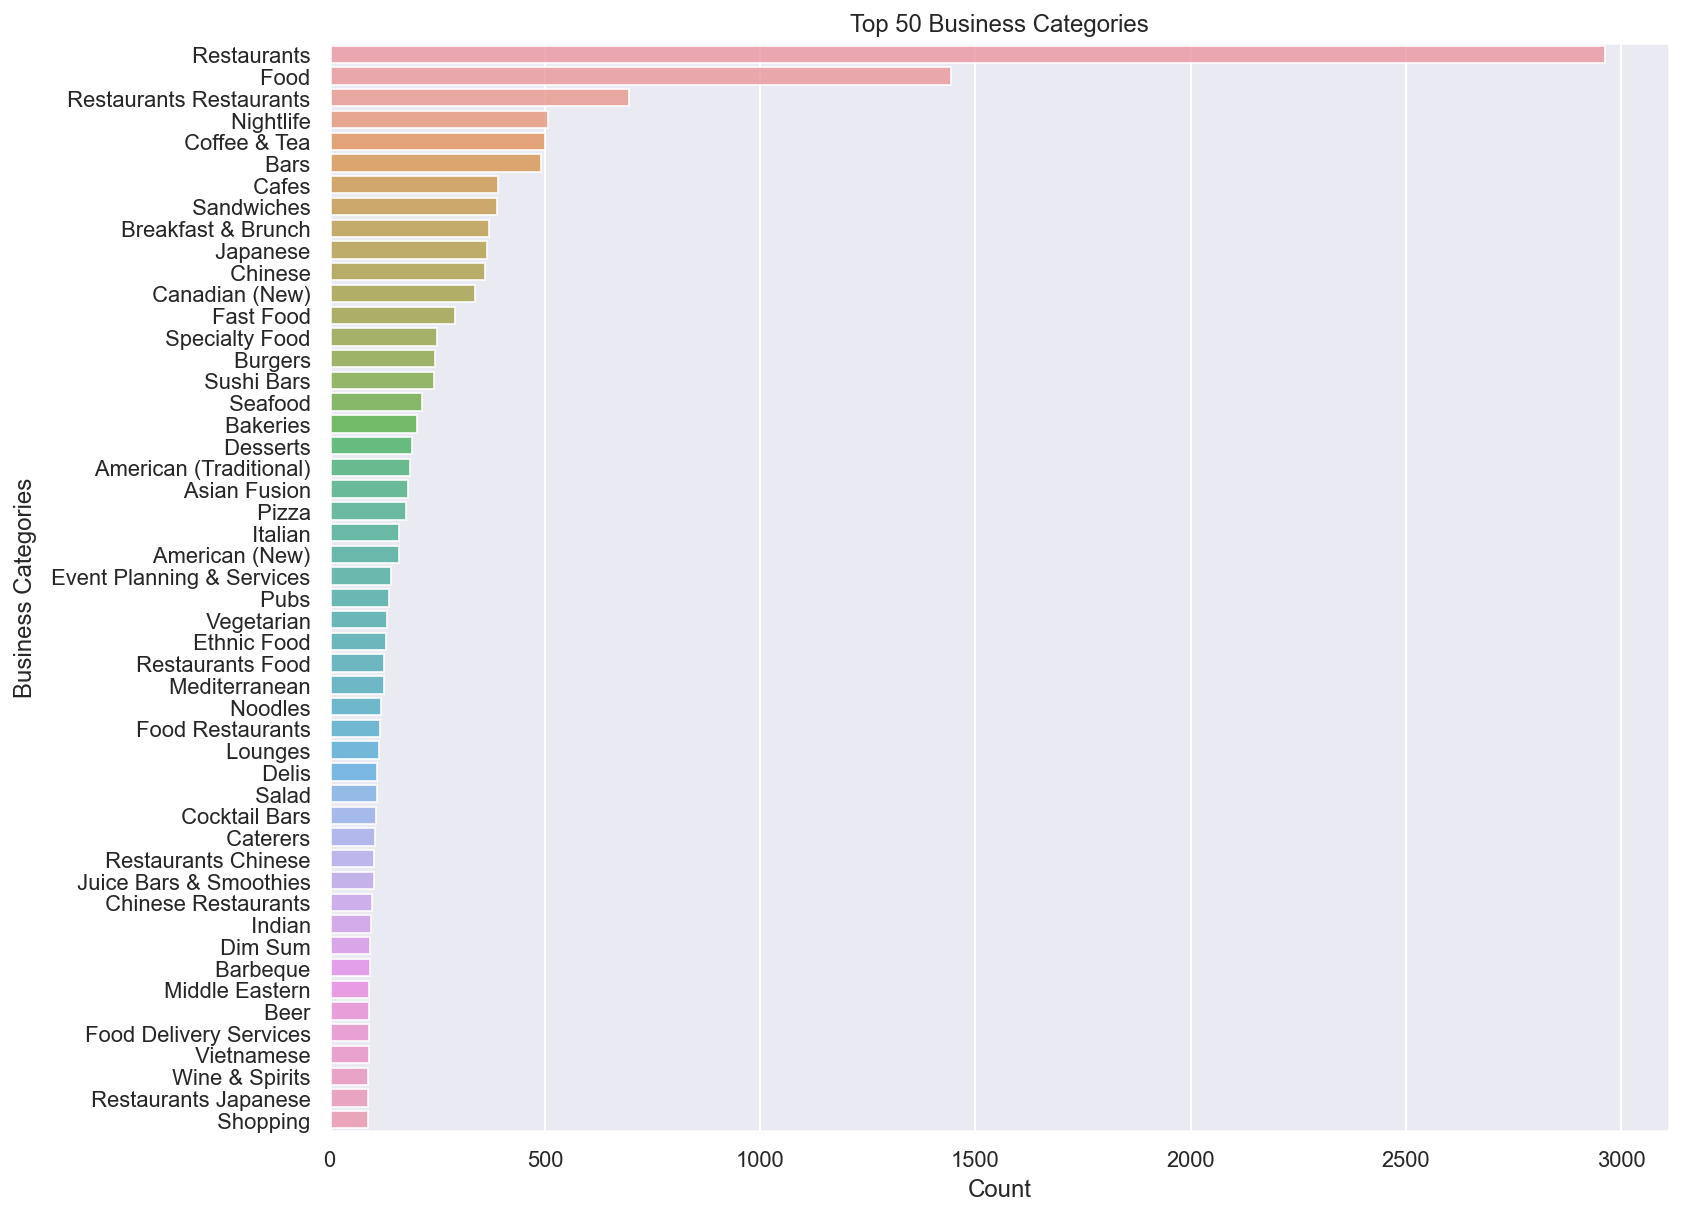

In [42]:
x = biz_category_df.category.value_counts(ascending=False)
top_20 = x.iloc[:50]

fig, ax = plt.subplots(figsize=(12, 10))
sns.barplot(x=top_20.values, y=top_20.index, alpha=0.8, orient='h')
ax.set_title("Top 50 Business Categories")
ax.set_ylabel("Business Categories")
ax.set_xlabel("Count")
plt.show();